In [3]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
iris = datasets.load_iris()

In [5]:
print(type(iris))
iris.keys()


<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(type(iris['data']), iris['data'].shape)
print(type(iris['target']), iris['target'].shape)
print(type(iris['target_names']), iris['target_names'].shape, iris['target_names'])
print(type(iris['DESCR'])) #, iris['DESCR'])
print(type(iris['feature_names']), iris['feature_names'])
print(type(iris['filename']), iris['filename'])

<class 'numpy.ndarray'> (150, 4)
<class 'numpy.ndarray'> (150,)
<class 'numpy.ndarray'> (3,) ['setosa' 'versicolor' 'virginica']
<class 'str'>
<class 'list'> ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'str'> /home/mr/anaconda3/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv


In [7]:
X = iris['data']
y = iris['target']

In [8]:
df = pd.DataFrame(X, columns= iris['feature_names'])

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
plt.style.use('ggplot')

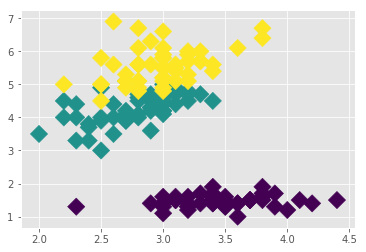

In [12]:
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'], c= y, marker='D', s= 150)

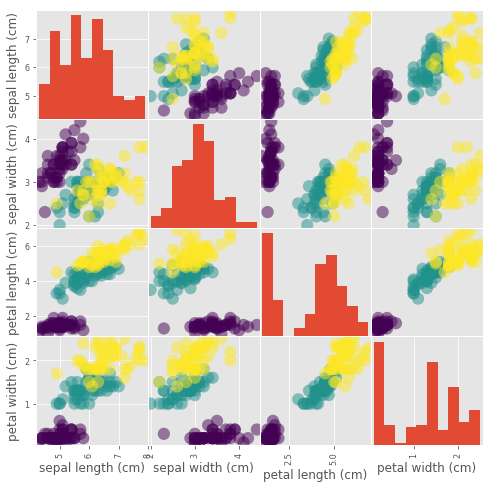

In [13]:
# Visual EDA (Exploratory Data Analysis)
# marker: represents shape of marker
# c: color, s: size of marker.
_ = pd.plotting.scatter_matrix(df, marker='o', figsize=[8,8], c=y,s=150)

In [14]:
import seaborn as sns

In [15]:
# sns.countplot()

In [16]:
# tips: dataset of a restaurant, each observation = each customer visit to restaurnt(alon/with family)
tips = sns.load_dataset("tips")

In [17]:
df = tips.sample(n=10)

In [18]:
df

,total_bill,tip,sex,smoker,day,time,size
45,18.29,3.00,Male,No,Sun,Dinner,2
175,32.90,3.11,Male,Yes,Sun,Dinner,2
179,34.63,3.55,Male,Yes,Sun,Dinner,2
116,29.93,5.07,Male,No,Sun,Dinner,4
121,13.42,1.68,Female,No,Thur,Lunch,2
140,17.47,3.50,Female,No,Thur,Lunch,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2
106,20.49,4.06,Male,Yes,Sat,Dinner,2
210,30.06,2.00,Male,Yes,Sat,Dinner,3
214,28.17,6.50,Female,Yes,Sat,Dinner,3


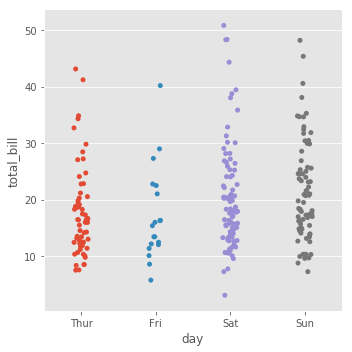

In [19]:
# Categorical scatterplots: show the relationship between a numerical and one or more categorical variables
# all of the points belonging to one category would fall on the same position
# along the axis corresponding to the categorical variable. 
sns.catplot(x="day", y="total_bill", data=tips)

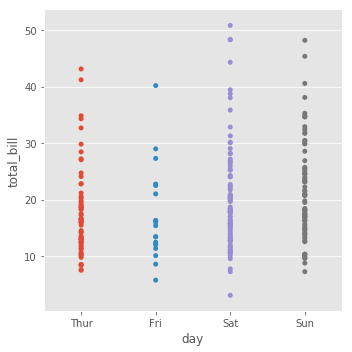

In [20]:
sns.catplot(x="day", y="total_bill",jitter=False, data=tips)

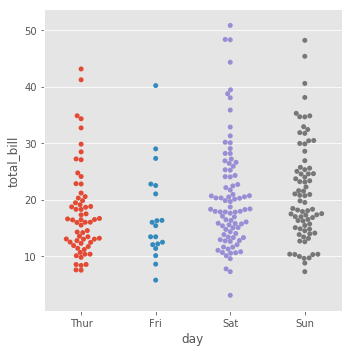

In [21]:
# In above approach overlapping of points is there
# To avoid overlapping use, 'kind=swarm'
sns.catplot(x="day", y="total_bill",kind='swarm', data=tips)

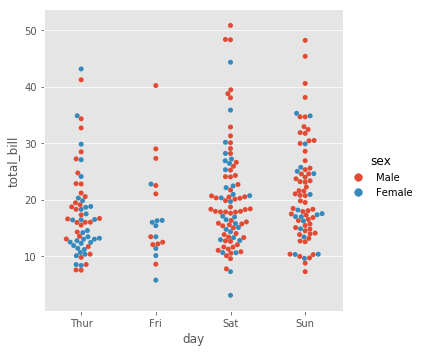

In [22]:
# Arguement: 'hue' --> To add another dimension to data
# 'hue' is used to distinguish data within each category on some other paramter.
sns.catplot(x="day", y="total_bill",hue='sex',kind='swarm', data=tips)

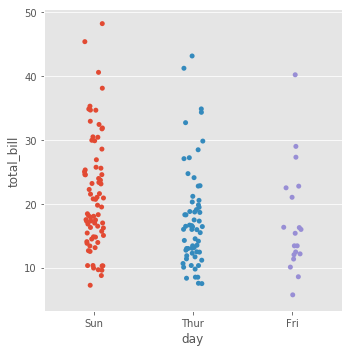

In [23]:
# To Define the order of categories appears on categorial axis
# Use Arguement: 'order'
sns.catplot(x="day", y="total_bill",order=['Sun','Thur','Fri'], data=tips)

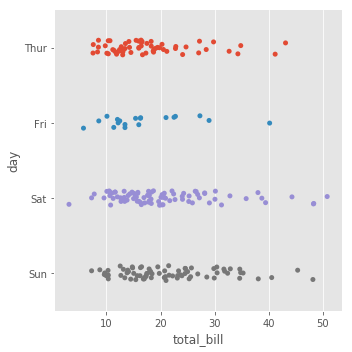

In [24]:
# To change the categorical axis, change 'x' and 'y'
sns.catplot(y="day", x="total_bill", data=tips)

In [25]:
df

,total_bill,tip,sex,smoker,day,time,size
45,18.29,3.00,Male,No,Sun,Dinner,2
175,32.90,3.11,Male,Yes,Sun,Dinner,2
179,34.63,3.55,Male,Yes,Sun,Dinner,2
116,29.93,5.07,Male,No,Sun,Dinner,4
121,13.42,1.68,Female,No,Thur,Lunch,2
140,17.47,3.50,Female,No,Thur,Lunch,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2
106,20.49,4.06,Male,Yes,Sat,Dinner,2
210,30.06,2.00,Male,Yes,Sat,Dinner,3
214,28.17,6.50,Female,Yes,Sat,Dinner,3


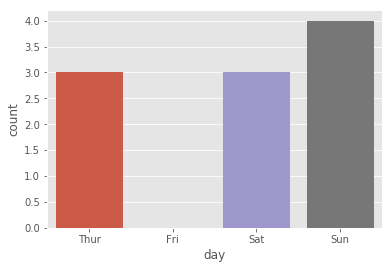

In [26]:
# countplot(): Show the counts of observations in each categorical bin using bars.
sns.countplot(x='day', data=df)

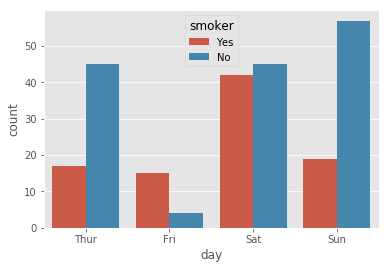

In [27]:
sns.countplot(x='day', hue='smoker', data=tips)

In [28]:
'''
Scikit-Learn Library
    - It has python class for each algorithm.
        - These classes have 2 main functionality
            - Fitting model to data i.e training 
            - Predicting for unlabelled data
    - Input to Scikit-Learn classes 
        - Numpy array or Pandas Dataframe 
            - All values must be continous i.e real not in string format 
            - No value shoud be missing 
            - Each row represent a new observation i.e a new training/testing example
            - Columns represent the features.
    - Important Methods
        - ob.fit(x_train,y_train)
        - result = ob.predict(x_test)
        - ob.score(x_test, y_test)
            - Mean accuracy in case of classification 
            - In case of Regression: R^2
            - see the documentation what is metric used to represent the score
'''
pass

In [176]:
# knn Classifier
# Takes vote of nearest 'k' datapoints/neighbors to predict the label of data point under consideration
from sklearn.neighbors import KNeighborsClassifier

In [177]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [178]:
X = iris['data']
y = iris['target']
print('shape of X and y: ',X.shape, y.shape)

shape of X and y:  (150, 4) (150,)


In [179]:
# Create the data using X and y
# Join X and y together than shuffle them
# complete_data = np.hstack((X,y.reshape(y.shape[0],1)))
complete_data = np.hstack((X,y.reshape(-1,1)))
np.random.shuffle(complete_data)
complete_data[:10]

array([[4.3, 3. , 1.1, 0.1, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.1, 2.5, 3. , 1.1, 1. ],
       [5.5, 2.3, 4. , 1.3, 1. ],
       [5.7, 2.9, 4.2, 1.3, 1. ],
       [6.5, 3. , 5.2, 2. , 2. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [6. , 2.9, 4.5, 1.5, 1. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ]])

In [180]:
n = complete_data.shape[0]
m = complete_data.shape[1] - 1
print(n,m)

150 4


In [181]:
'''Splitting data in train and test '''
# train_split = int(0.8*n)
# xtrain = complete_data[:train_split, :-1]
# ytrain = complete_data[:train_split, -1]
# xtest = complete_data[train_split:, :-1]
# ytest = complete_data[train_split:, -1]
from sklearn.model_selection import train_test_split

In [182]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
'''
This stratify parameter makes a split so that the proportion of values in the sample produced 
will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and
there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split
has 25% of 0's and 75% of 1's.
'''
pass

In [183]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(105, 4) (105,)
(45, 4) (45,)


In [202]:
knn = KNeighborsClassifier(n_neighbors=5)

In [203]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [204]:
ypredict = knn.predict(xtest)
ypredict

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2,
       1])

In [205]:
print(ypredict == ytest)
accuracy = sum(ypredict == ytest)
accuracy/len(ytest)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True]


0.9777777777777777

In [206]:
knn.score(xtest, ytest)

0.9777777777777777

In [210]:
k_values = list(range(1, 20))
train_error = np.zeros(len(k_values))
test_error = np.zeros(len(k_values))

In [211]:
for i,k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    train_error[i] = knn.score(xtrain, ytrain)
    test_error[i] = knn.score(xtest, ytest)

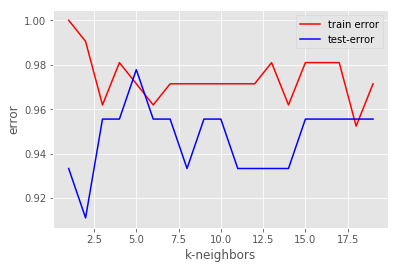

In [213]:
plt.figure("train/test error over different k")
plt.plot(k_values, train_error, 'r', label='train error')
plt.plot(k_values, test_error, 'b', label='test-error')
plt.xlabel("k-neighbors")
plt.ylabel("error")
plt.legend()
plt.show()
# When k = low then Overfitting 
# when k = high then Underfitting 
# Best performance is on k = 5, this information for best value of 'k' can also be found using HyperParameter 
# Tuning, we can use GridSearchCV to find what is the best value of 'k'

In [42]:
# MNIST mini digits dataset 
digits = datasets.load_digits()
print(type(digits))
print(digits.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [43]:
print(digits.data.shape)  # digits['data'].shape
print(digits.images.shape) # digits['images'].shape  Both things are similar

(1797, 64)
(1797, 8, 8)


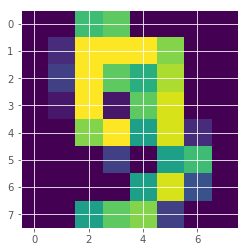

In [44]:
# plt.imshow(X) : to display array like images on 2D plot.
plt.imshow(digits.images[9])
plt.show()

In [45]:
# Regression model
# Housing Data 
boston = datasets.load_boston()
print(boston.data.shape)
print(boston.target.shape)
print(boston.feature_names)
print(boston.keys())
# print(boston.DESCR)

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [46]:
X = boston.data 
y = boston.target
print(X.shape, y.shape)

(506, 13) (506,)


In [47]:
import pandas as pd 

In [48]:
df = pd.DataFrame(X, columns=boston.feature_names)
df['Price'] = y 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


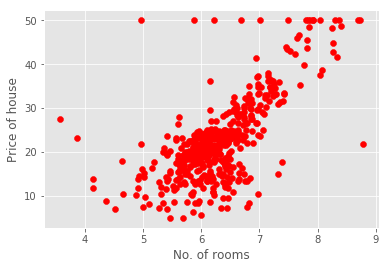

In [49]:
plt.scatter(X[:,5], y,c="r")
plt.xlabel("No. of rooms")
plt.ylabel("Price of house")
plt.show()

In [50]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [51]:
reg = LinearRegression()

In [52]:
X_rooms = X[:,5]
X_rooms = X_rooms.reshape(-1,1) # Features array must be 2d array for LinearRegression of sklearn
X_rooms.shape

(506, 1)

In [53]:
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
prediction_space = np.linspace(start=min(X_rooms), stop=max(X_rooms))
print(prediction_space.shape)

(50, 1)


In [55]:
prediction = reg.predict(prediction_space)
prediction

array([-2.25801069, -1.28854321, -0.31907572,  0.65039176,  1.61985925,
        2.58932673,  3.55879422,  4.5282617 ,  5.49772919,  6.46719667,
        7.43666416,  8.40613164,  9.37559913, 10.34506661, 11.3145341 ,
       12.28400158, 13.25346907, 14.22293655, 15.19240404, 16.16187152,
       17.13133901, 18.10080649, 19.07027398, 20.03974146, 21.00920895,
       21.97867643, 22.94814392, 23.9176114 , 24.88707889, 25.85654638,
       26.82601386, 27.79548135, 28.76494883, 29.73441632, 30.7038838 ,
       31.67335129, 32.64281877, 33.61228626, 34.58175374, 35.55122123,
       36.52068871, 37.4901562 , 38.45962368, 39.42909117, 40.39855865,
       41.36802614, 42.33749362, 43.30696111, 44.27642859, 45.24589608])

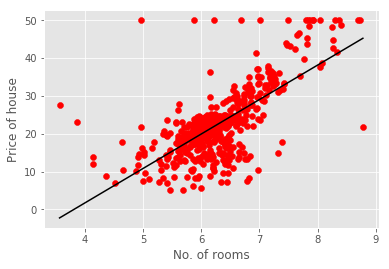

In [56]:
plt.scatter(X_rooms, y,c="r")
plt.xlabel("No. of rooms")
plt.ylabel("Price of house")
plt.plot(prediction_space, prediction, color='black')
plt.show()

In [57]:
# HeatMap of correlation between different features and target variable i.e  Price of house 

In [58]:
# df.corr(): pairwise correlation btw all the columns 

In [59]:
import seaborn as sns

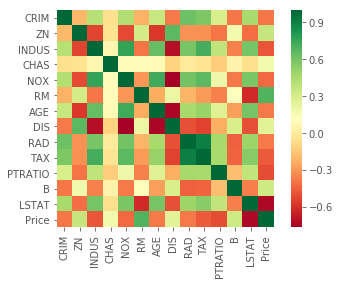

In [60]:
sns.heatmap(df.corr(),square=True,cmap="RdYlGn" )

In [61]:
'''
Problem with using only Train and Test split
Scenario 
 - We fit model on Train set and calculate evaluation_metric/score on test split.
 - This score on test split represent the models capability/performance to generalize on unseen data.
Problem
 - This metric/score which measure Models' performance is dependent on how we will split data.
 - Test split may have some peculiarity(uncommon features/pattern) which doesn't represent the whole data.
    - Means these uncommon features only belonged to these few examples in the test split.
 - So taking score on such test split is not the correct evaluation of model.

Solution: Coss validation 
 - We split the data in k-folds i.e k-groups, then one by one consider each fold as test set, train on 
   remaining folds and compute score/metric on test set. At end we have 'k' score/metrics. 
 - We can compute mean/median of these 'k' scores/metrics to determine the Models performance. 
 - This method is 'k' fold cross validation.
 
Drawback
 - More folds more computationally expensive 
'''
pass

In [62]:
# Cross validation 
from sklearn.model_selection import cross_val_score

In [63]:
reg_all = LinearRegression()
print(X.shape, y.shape)

(506, 13) (506,)


In [64]:
# results = cross_val_score(reg_all, X, y, cv=5)
%timeit cross_val_score(reg_all, X, y, cv=5)

6.18 ms ± 206 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [65]:
%timeit cross_val_score(reg_all, X, y, cv=10)

12 ms ± 841 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
results = cross_val_score(reg_all, X, y, cv=5)

In [67]:
# Scores on Each fold. 
# Score = R^2, for LinearRegression this is default metric
results

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [68]:
np.mean(results)
# This values actually represents models performance

0.3532759243958772

In [1]:
'''
Regularization 
1. Ridge
    - Cost/loss =  MSE + alpha*SUMMATION(theta^2)
    - For training model this is better than lasso
    - L2 Regularization
2. Lasso 
    - Cost/loss = MSE + alpha*SUMMATION(|theta|) 
    - Lasso can be used to select important features of a dataset (FEATURE SELECTION). 
    - It shrinks parameters/coef of less important features to exactly zero. 
    - We can identify which features are useful predictors.
    - But why not Ridge Regularization can do this ?
    - L1 Regularization
'''
pass

In [70]:
from sklearn.linear_model import Ridge, Lasso

In [71]:
ridge = Ridge(alpha= 0.1, normalize=True)
lasso = Lasso(alpha= 0.1, normalize=True)

In [72]:
X = boston.data 
y = boston.target

In [73]:
print(X.shape, y.shape)

(506, 13) (506,)


In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=42)

In [75]:
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

(354, 13) (152, 13)
(354,) (152,)


In [76]:
ridge.fit(xtrain, ytrain)
lasso.fit(xtrain, ytrain)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
ridge.score(xtest, ytest)

0.6996938275127313

In [78]:
lasso.score(xtest,ytest)

0.5950229535328551

In [79]:
ridge_coef = ridge.coef_
lasso_coef = lasso.coef_
print(len(ridge_coef), len(lasso_coef))

13 13


In [80]:
features_arr = boston.feature_names
len(features_arr)

13

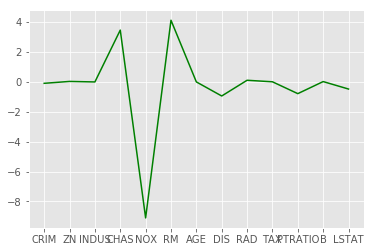

In [81]:
plt.plot(features_arr, ridge_coef, 'g')
plt.show()

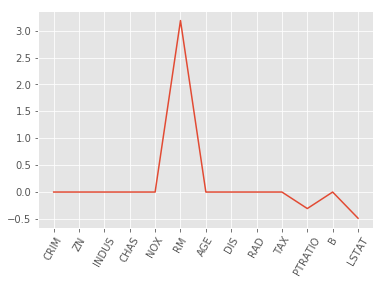

In [82]:
plt.plot(features_arr, lasso_coef)
plt.xticks(rotation=60)
plt.show()

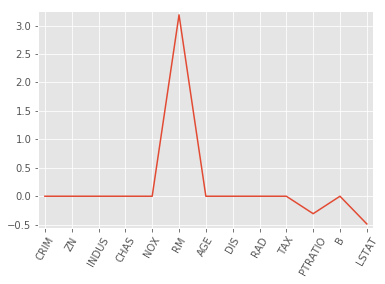

In [83]:
plt.plot(range(len(features_arr)), lasso_coef)
plt.xticks(range(len(features_arr)), features_arr, rotation=60)
plt.margins(0.02)

In [84]:
'''
Class Imbalance (Classification)
 - When target variable distribution is imbalance
 - E.g: Data: 95 Not Spam, 5 Spam. 
 - Then Accuracy is not good measure. 
Metrics 
 - Confussion Matrix (TP, FN, FP, TN): Prediction on y-axis, Actual on x-axis
 - Precision = TP/(TP+FP): inversly proportional to False Positive Rate
 - Recall = TP/(TP+FN): also k/a Hit Ratio, Sensitivity, True Positive Rate. 
 - True Positive Rate: defines ability to predict True Positives (High for good model)
 - False Positive Rate: defines ability to predict False Positives (low for good model)
'''
pass 

In [85]:
'''
Evaluation Metric for Classification
  - Accuracy 
  - Precision, Recall, F1-score
  - Area under ROC curve
'''
pass

In [86]:
cancer = datasets.load_breast_cancer()

In [87]:
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [88]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [89]:
cancerDf = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancerDf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [90]:
cancerDf['type'] = cancer.target
cancerDf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [91]:
import seaborn as sns

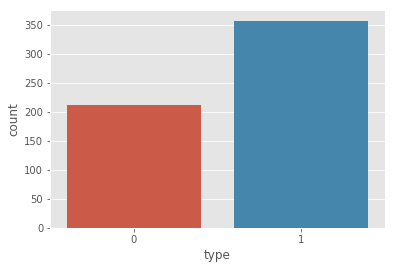

In [92]:
sns.countplot('type', data=cancerDf)

In [93]:
y = cancerDf['type'].values
print(y[:20])
print(y.shape)
y = np.bitwise_xor(y, 1)
y[:20]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
(569,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [94]:
X = cancerDf.drop(labels=["type"], axis=1).values
print(X.shape)

(569, 30)


In [95]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

In [96]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(398, 30) (398,)
(171, 30) (171,)


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [98]:
logreg = LogisticRegression()

In [99]:
logreg.fit(xtrain, ytrain)

/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [100]:
ypred = logreg.predict(xtest)
print(ypred.shape, ytest.shape)

(171,) (171,)


In [101]:
# old
conf_mat = confusion_matrix(ytest, ypred)
conf_mat

array([[106,   1],
       [  9,  55]])

In [102]:
conf_mat = confusion_matrix(ytest, ypred)
conf_mat

array([[106,   1],
       [  9,  55]])

In [103]:
# old
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       107
           1       0.98      0.86      0.92        64

   micro avg       0.94      0.94      0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [104]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       107
           1       0.98      0.86      0.92        64

   micro avg       0.94      0.94      0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [105]:
# estimator.predict_proba(x_test) : This function gives Probability of an example being in target classes.
yprob = logreg.predict_proba(xtest)
yprob

array([[7.45464801e-01, 2.54535199e-01],
       [9.87624677e-01, 1.23753226e-02],
       [9.13857228e-01, 8.61427722e-02],
       [9.91790194e-01, 8.20980642e-03],
       [9.87736669e-01, 1.22633309e-02],
       [9.98800648e-01, 1.19935154e-03],
       [3.08178864e-05, 9.99969182e-01],
       [8.28647911e-01, 1.71352089e-01],
       [6.95975284e-01, 3.04024716e-01],
       [9.98560185e-01, 1.43981467e-03],
       [9.79783455e-01, 2.02165449e-02],
       [2.75011125e-11, 1.00000000e+00],
       [9.97535161e-01, 2.46483867e-03],
       [9.93953098e-01, 6.04690222e-03],
       [9.99827432e-01, 1.72567518e-04],
       [9.30422462e-01, 6.95775376e-02],
       [9.98907632e-01, 1.09236789e-03],
       [2.38636187e-06, 9.99997614e-01],
       [0.00000000e+00, 1.00000000e+00],
       [4.28791003e-10, 1.00000000e+00],
       [1.83630888e-13, 1.00000000e+00],
       [5.04204752e-01, 4.95795248e-01],
       [2.14273044e-13, 1.00000000e+00],
       [9.99425117e-01, 5.74882982e-04],
       [9.877898

In [106]:
# ROC curve: Receiver Operating Characteristic
fpr, tpr, threshold = roc_curve(y_true=ytest,y_score= yprob[:,1])

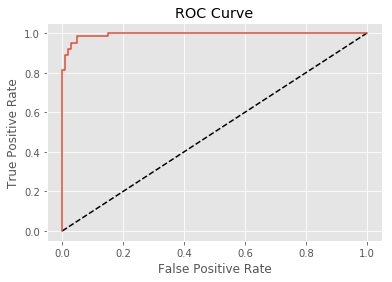

In [107]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

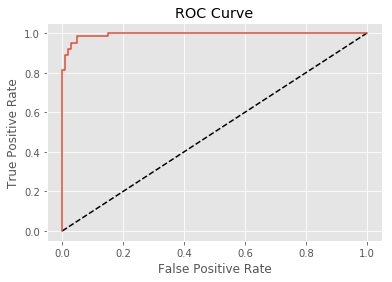

In [108]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

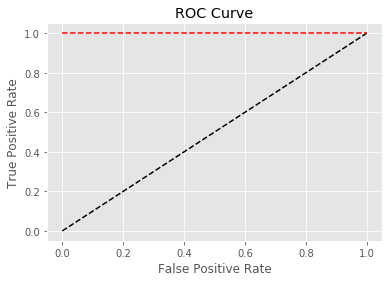

1.0


In [109]:
# Ideal Case of ROC curve, when area under curve = 1 
temp_fpr = np.zeros(171)
temp_tpr = np.ones(171)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
# For ideal case, fpr =0, tpr = 1 i.e it predicted everything correctly and area_under_curve = 1
print(roc_auc_score([0, 1], [0, 1]))

In [110]:
'''
Say you have a binary classifier that in fact is just randomly making guesses. 
It would be correct approximately 50% of the time, and the resulting ROC curve would be a 
diagonal line in which the True Positive Rate and False Positive Rate are always equal. 
The Area under this ROC curve would be 0.5. This is one way in which the AUC, which Hugo discussed in the video,
is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than
random guessing. Always a good sign!
'''

'\nSay you have a binary classifier that in fact is just randomly making guesses. \nIt would be correct approximately 50% of the time, and the resulting ROC curve would be a \ndiagonal line in which the True Positive Rate and False Positive Rate are always equal. \nThe Area under this ROC curve would be 0.5. This is one way in which the AUC, which Hugo discussed in the video,\nis an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than\nrandom guessing. Always a good sign!\n'

In [111]:
roc_auc_score(ytest, yprob[:,1])

0.9940128504672897

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
cross_val_score(logreg, X, y, cv=5, scoring="roc_auc")

/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

array([0.99450904, 0.99192506, 0.99664655, 0.98256204, 0.99664655])

In [114]:
cross_val_score(logreg, X, np.bitwise_xor(y,1), cv=5, scoring="roc_auc")

/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

array([0.99450904, 0.99192506, 0.99731724, 0.98289738, 0.99664655])

In [115]:
# HyperParameter Tuning
'''
HyperParameter Tuning 

1. GridSearchCV(model, param_grid, cv)
    - Try all the combinations of parameters. 
    - Arguements: model, parameters' grid to tune over, no. of folds.
    - METHODS
        - param_grid = {"param1": [value1, value2,], "param2": [value1, value2,...]}
        - ob = GridSearchCV(model, param_grid, cv=5)
        - ob.fit(X,y) : This performs actual grid search i.e Loop over all combinations.
        - ob.best_params_ : Gives the Hyper parameters that perform best 
        - ob.best_score_  : Gives best mean cross validation scores.
        - ob.best_estimator: object of the model that performed best.
            - HOW DOES BEST ESTIMATOR GOT SELECTED 
        - ob.cv_results_: Detailed summary of the GridSearch. 
            - pd.DataFrame(ob.cv_results_): For representation
2. RandomizedSearchCV
    - Study more about this
'''

'\nHyperParameter Tuning \n\n1. GridSearchCV(model, param_grid, cv)\n    - Try all the combinations of parameters. \n    - Arguements: model, parameters\' grid to tune over, no. of folds.\n    - METHODS\n        - param_grid = {"param1": [value1, value2,], "param2": [value1, value2,...]}\n        - ob = GridSearchCV(model, param_grid, cv=5)\n        - ob.fit(X,y) : This performs actual grid search i.e Loop over all combinations.\n        - ob.best_params_ : Gives the parameters that perform best \n        - ob.best_score_  : Gives best mean cross validation score.\n\n2. RandomizedSearchCV\n    - Study more about this\n'

In [116]:
'''
np.logspace(start, stop, num, endpoint,base): see documentation for other parameters
    - In linear space, the sequence starts at base ** start (base to the power of start) 
      and ends with base ** stop.
    - Return numbers spaced evenly on a log scale i.e if numbers obtained on linear space are plotted on logscale
      y = np.log10(x), then we get evenly spaced numbers.
    - See examples below for clarity.
'''
x1 = np.logspace(-1,8,20)
print(x1)
x2 = np.log10(x1)
print(x2)

[1.00000000e-01 2.97635144e-01 8.85866790e-01 2.63665090e+00
 7.84759970e+00 2.33572147e+01 6.95192796e+01 2.06913808e+02
 6.15848211e+02 1.83298071e+03 5.45559478e+03 1.62377674e+04
 4.83293024e+04 1.43844989e+05 4.28133240e+05 1.27427499e+06
 3.79269019e+06 1.12883789e+07 3.35981829e+07 1.00000000e+08]
[-1.         -0.52631579 -0.05263158  0.42105263  0.89473684  1.36842105
  1.84210526  2.31578947  2.78947368  3.26315789  3.73684211  4.21052632
  4.68421053  5.15789474  5.63157895  6.10526316  6.57894737  7.05263158
  7.52631579  8.        ]


In [117]:
y1 = np.zeros(len(x1))
y1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

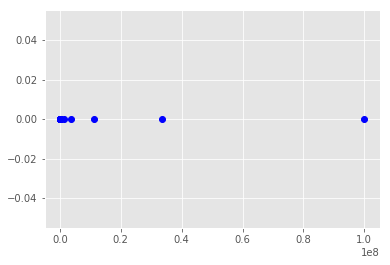

In [118]:
plt.plot(x1, y1, 'bo')
plt.show()

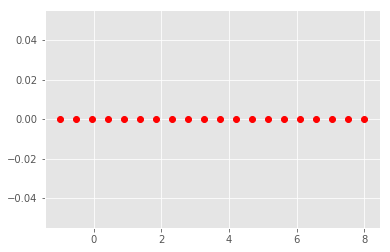

In [119]:
plt.plot(x2, y1, 'ro')

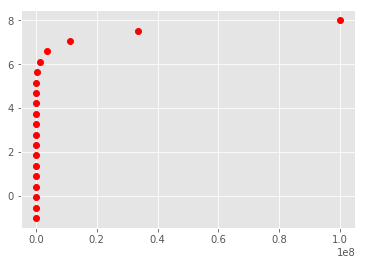

In [120]:
plt.plot(x1, x2, 'ro')

In [121]:
# df.boxplot()
# pd.get_dummies(df, drop_first=)
# df.col_name.replace(0, np.nan, inplace=True) : Replace values in a column

In [122]:
'''
Handling Categorical Features 
    - Convert Categorical features to binary
        - Say if we have feature: 'sex' and has two values 'Male' and 'Female'
        - Then we create two columns in place of 'sex' i.e 'sex_Male' and 'sex_Female' having values 0/1
    - Using scikit-learn: oneHotEncoder()
    - pandas: pd.get_dummies(df, drop_first)
'''

"\nHandling Categorical Features \n    - Convert Categorical features to binary\n        - Say if we have feature: 'sex' and has two values 'Male' and 'Female'\n        - Then we create two columns in place of 'sex' i.e 'sex_Male' and 'sex_Female' having values 0/1\n    - Using scikit-learn: oneHotEncoder()\n    - pandas: pd.get_dummies(df, drop_first)\n"

In [123]:
temp_df = tips[['total_bill', 'tip', 'sex', 'size']]
temp_df.head()

,total_bill,tip,sex,size
0,16.99,1.01,Female,2
1,10.34,1.66,Male,3
2,21.01,3.50,Male,3
3,23.68,3.31,Male,2
4,24.59,3.61,Female,4


In [124]:
# Convert categorical feature sex into numerical feature
pd.get_dummies(temp_df).head()

,total_bill,tip,size,sex_Male,sex_Female
0,16.99,1.01,2,0,1
1,10.34,1.66,3,1,0
2,21.01,3.50,3,1,0
3,23.68,3.31,2,1,0
4,24.59,3.61,4,0,1


In [125]:
# Now say if sex_Male = 0, then it is obvious that sex_Female = 1, so in real we don't need 2 variables
# 1 variable is sufficient to encode the information
# Similarily if a categorical feature has 3 values the only 2 numerical variables are enough
# To apply this use pd.get_dummies(df, drop_first= True) --> set drop_first = True
# This will drop the first column from the total new columns
pd.get_dummies(temp_df, drop_first=True).head()

,total_bill,tip,size,sex_Female
0,16.99,1.01,2,1
1,10.34,1.66,3,0
2,21.01,3.50,3,0
3,23.68,3.31,2,0
4,24.59,3.61,4,1


In [126]:
'''
Handling Missing Data
    - Missing data can be in form of "?, 0, Nan, -1"
    - Replace all the missing values with np.nan
    - Detecting missing values
        - df.isnull()
# Dealing with missing data 
    - Remove all the rows containing missing values
         - df.dropna()  # remove all rows containing missing values.
         - Missing Values must be represented by 'NaN', these functions consider 'NaN' as missing value
         - This is good if only few rows have missing data otherwise it leads to lot of data loss
         - Not a good method when many rows have missing data
    - Remove all the columns having missing data 
        - Bad way to deal 
    - Imputing missing data 
        - Impute means making educated guess about the missing values 
        - Approach1 : Replace missing value with mean of non-missing entries.
            - Imputer(missing_values='NaN', strategy='mean', axis=0) 
        - Imputer is also k/a TRANSFORMER
        - Methods
            - imp = Imputer(missing_values = 'NaN', strategy='mean', axis=0)
            - imp.fit(X)
            - X = imp.transform(X)
        - Approach2: If data is in text form, replace missing value with space
'''
pass

In [127]:
df = pd.read_csv("./datasets/diabetes.csv")

In [128]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [129]:
# Data is missing in columns: Glucose, BloodPressure, SkinThickness, Insulin, BMI. 
# How ? --> Values of these features is 0 in several cases which is not possible for any human. 

In [130]:
df.columns= [ name.lower() for name in df.columns ] 
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [131]:
df2 = df.copy()

In [132]:
# Replace 0 with Nan 
df2.insulin.replace(0, np.nan, inplace=True)
df2.bmi.replace(0, np.nan, inplace=True)
df2.skinthickness.replace(0, np.nan, inplace=True)
df2.bloodpressure.replace(0, np.nan, inplace=True)
df2.glucose.replace(0, np.nan, inplace=True)

In [133]:
df2.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [134]:
df2.isnull().sum()
# Gives no. of missing values in each column

pregnancies                   0
glucose                       5
bloodpressure                35
skinthickness               227
insulin                     374
bmi                          11
diabetespedigreefunction      0
age                           0
outcome                       0
dtype: int64

In [135]:
# Dealing with missing data 
# Remove all the rows containing missing data 
df2.shape

(768, 9)

In [136]:
# df.dropna(axis=0/1, how='any/all') 
df2.dropna().shape
# There is significant loss in data by removing the rows

(392, 9)

In [137]:
# Imputing missing values: making an educated guess about missing values 
from sklearn.preprocessing import Imputer

In [138]:
# Replace missing values with mean along the columns
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
# for np.nan using string 'NaN'

/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [139]:
imp.fit(df2)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [140]:
tmp = imp.transform(df2)

In [141]:
df3 = pd.DataFrame(data=tmp, columns= df2.columns)

In [142]:
df3.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [143]:
# Now we can train mL model 
y = df3['outcome'].values
X = df3.drop(columns=['outcome']).values
print(X.shape, y.shape)

(768, 8) (768,)


In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [145]:
logreg = LogisticRegression()

In [146]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(537, 8) (537,)
(231, 8) (231,)


In [147]:
logreg.fit(xtrain, ytrain)

/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [148]:
logreg.score(xtest, ytest)

0.7489177489177489

In [149]:
# Accuracy without replacing missing values 
y2 = df['outcome'].values
X2 = df.drop(columns=['outcome']).values
print(X2.shape, y2.shape)

(768, 8) (768,)


In [150]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2,y2, test_size=0.3, random_state=42, stratify=y2)
print(xtrain2.shape, ytrain2.shape)
print(xtest2.shape, ytest2.shape)

(537, 8) (537,)
(231, 8) (231,)


In [151]:
logreg = LogisticRegression()

In [152]:
logreg.fit(xtrain2, ytrain2)

/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [153]:
logreg.score(xtest2, ytest2)

0.7359307359307359

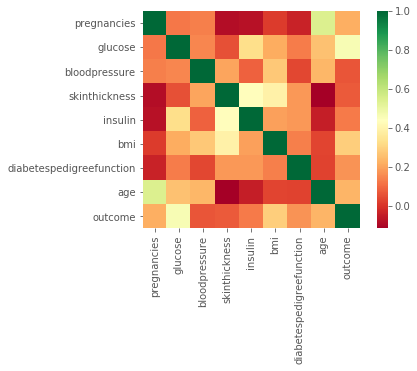

In [154]:
sns.heatmap(df.corr(),square=True,cmap="RdYlGn" )
# outcome is negatively correlated with bloodpressure, skinthickness, insulin, so there missing values will effect
# performance

In [155]:
'''
Pipeline
    - Sequentially apply a list of transformers and a final estimator.
    - Pipeline(steps, memory=None)
    - steps = [('transformer_name', transformer_obj), ('t2', t2_object),..., ('estimator-name', estimator_obj)]
    - In pipeline, last step will be estimator and before that all must be transformers like 'Imputer', 'StandarScalar'
    - We can change the particular step or parameters of particular step 
        - pipeline_obj.set_params(stepName__parameterName= newValue)
        - pipeline_obj.set_params(stepName= newStepObj)
            - Like we changed logistic_regression to knn below
'''
pass

In [156]:
from sklearn.pipeline import Pipeline

In [157]:
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis= 0)

/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [158]:
logreg = LogisticRegression()

In [159]:
steps = [('imputation', imp), ('estimator', logreg)]
pipeline = Pipeline(steps)

In [160]:
pipeline.fit(xtrain, ytrain)

/home/mr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('imputation', Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
    verbose=0)), ('estimator', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [161]:
pipeline.score(xtest, ytest)

0.7489177489177489

In [162]:
pipeline.get_params()

{'memory': None,
 'steps': [('imputation',
   Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
       verbose=0)),
  ('estimator',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='warn',
             n_jobs=None, penalty='l2', random_state=None, solver='warn',
             tol=0.0001, verbose=0, warm_start=False))],
 'imputation': Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
     verbose=0),
 'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 'imputation__axis': 0,
 'imputation__copy': True,
 'imputation__missing_values': 'NaN',
 'imputation__strategy': 'most_frequent',
 'imputation__verbose': 0,
 'estimator__C': 

In [163]:
knn = KNeighborsClassifier(n_neighbors=5)

In [164]:
pipeline.set_params(imputation__strategy='median', estimator=knn)
# changing the parameter of a imputation step 
# changing the estimator step from logistic_regression to knn

Pipeline(memory=None,
     steps=[('imputation', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('estimator', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])

In [165]:
pipeline.fit(xtrain,ytrain)

Pipeline(memory=None,
     steps=[('imputation', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('estimator', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])

In [166]:
pipeline.score(xtest, ytest)

0.6883116883116883

In [167]:
# df.isnull() : return a shape sized object with NA values such as 'NaN' mapped to True and rest to False.
temp = df2.isnull()
temp.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [168]:
temp.sum()

pregnancies                   0
glucose                       5
bloodpressure                35
skinthickness               227
insulin                     374
bmi                          11
diabetespedigreefunction      0
age                           0
outcome                       0
dtype: int64

In [169]:
df4 = df2.copy()

In [170]:
df5 = df4.replace(np.nan , 'manish')

In [172]:
df5.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,manish,33.6,0.627,50,1
1,1,85,66,29,manish,26.6,0.351,31,0
2,8,183,64,manish,manish,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [175]:
'''
Complete Pipeline 
1. Data Analysis (EDA/Visual/Numerical)
    - Visual
        - Heat Map: Showing correlation between different features and target values 
        - Scatter Matrix: Showing correlation between different features and Count plot of different features
    - Numerical
        - Checking Mean and STD of features 
        - Use pandas: df.info() and df.describe()
2. Data Preprocessing 
    - Handling Missing Values 
        - Removing missing values' rows and columns
        - Imputing missing values
    - Handling Categorical Data 
        - Changing categorical to numerical 
        - Use 'scikit-learn: oneHotEncoder()' or 'pandas: get_dummies(df, drop_first=False)'
    - Normalizing and Scaling Data 
3. Model Training 
    - Splitting data in Cross-validation set and hold out set 
    - HyperParameter Tuning using GridSearchCV or RandomSearchCV 
    - Predicting values on 'hold-out' set using Best parameters 
4. Model Evaluation 
    - Score of the Model 
    - Classification
        - Accuracy 
        - Confusion Matrix
        - Classification Report: Precision/Recall/F1-score
        - ROC Curve 
        - Area Under ROC Curve
    - Regression 
        - MSE
        - R-squared 
    - Checking: Overfitting and Underfitting
        - Plot Learning curve (Train and Test error vs train-set-size (m))
            - Give idea about what could be done if model's performance is down 
            - High Variance: More data is required
            - High Bias: Some modification in Hypothesis is required. 
'''
pass

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000
